In [ ]:
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('x')
plt.ylabel('x square')
plt.show()

In [ ]:
base_dir = '/Users/itversity/Research/data/linkedin'
source_file = '{base_dir}/{file_name}'

In [ ]:
import pandas as pd

contacts_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Contacts.csv'
)

contacts = pd.read_csv(contacts_src).astype(str)
contacts

In [ ]:
contacts_count_by_source = contacts.groupby(contacts['Source'])['Source'].count()

In [ ]:
contacts_count_by_source.index.tolist()

In [ ]:
contacts_count_by_source.values.tolist()

In [ ]:
plt.plot(contacts_count_by_source.index.tolist(), 
         contacts_count_by_source.values.tolist()
        )
plt.xlabel('Contact Source')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()
plt.

In [2]:
base_dir = '/Users/itversity/Research/data/linkedin'
source_file = '{base_dir}/{file_name}'

In [3]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('`Connected On`.str.contains("2017") or `Connected On`.str.contains("2018")', engine='python')
connections

,First Name,Last Name,Email Address,Company,Position,Connected On
2432,dcdbd5ee9cc84b07,c836f47cefaed87a,nan,Virtusa,Senior Consultant,31 Dec 2018
2433,1b48dd706a05529d,9f020a84886ab17e,nan,Bayer,Data Analytics Lead,31 Dec 2018
2434,81bd075bec50b585,13750ce1b05934ad,nan,Confidential,Program/Engagement Director - Innovation & En...,31 Dec 2018
2435,15be3b238e4156c2,d12a54842ad66bc6,nan,Concirrus,Team Lead (Quest Marine Hull) and Sr. Data Ana...,31 Dec 2018
2436,b8c9f0200a5342eb,20c7831ec03d8c85,nan,"Oalva, Inc.",Hadoop Administrator,31 Dec 2018
...,...,...,...,...,...,...
18723,aa5af8e173cfcf24,1a315620878e5af6,nan,Atos Syntel,Consultant,01 Jan 2017
18724,cb590ecf8a932956,febf7a7e2f605907,nan,Ernst & Young,Big Data-Data Science Evangelist/Sr.Analytics ...,01 Jan 2017
18725,f798f3280ccb2d6e,56053813ae694d4d,nan,nan,nan,01 Jan 2017
18726,aa7133e6205fb23f,8121a6fe0f0a8d9e,nan,Hewlett Packard Enterprise,Associate Hadoop Developer,01 Jan 2017


In [10]:
l = []
for i in connections['Connected On'].sort_values().unique():
    l.append(i)

In [12]:
l = [
 '01 Apr 2017', '01 Apr 2018', '01 Aug 2017', '01 Aug 2018', '01 Dec 2017',
 '01 Dec 2018', '01 Feb 2017', '01 Feb 2018', '01 Jan 2017', '01 Jan 2018'
]

In [15]:
import datetime

l.sort(key=lambda k: datetime.datetime.strptime(k, '%d %b %Y'))
l

['01 Jan 2017',
 '01 Feb 2017',
 '01 Apr 2017',
 '01 Aug 2017',
 '01 Dec 2017',
 '01 Jan 2018',
 '01 Feb 2018',
 '01 Apr 2018',
 '01 Aug 2018',
 '01 Dec 2018']

In [ ]:
connection_count_by_company = connections.groupby('Company')['Company'].count()
connection_count_by_company

In [ ]:
type(connection_count_by_company)

In [ ]:
connection_count_by_company[connection_count_by_company.ge(50) == True]

In [ ]:
connections[connections['Company'] == 'Cognizant']

In [ ]:
import datetime
connections['Connected Month'] = connections['Connected On']. \
    apply(lambda d: datetime.datetime.strptime(d, '%d %b %Y').strftime('%Y-%m'))

In [ ]:
connections

In [ ]:
connections_cognizant = connections.query('Company == "Cognizant"')
connections_cognizant

In [ ]:
connections_cognizant_by_month = connections_cognizant. \
    groupby('Connected Month')['Connected Month'].count()
connections_cognizant_by_month

In [ ]:
connections_tcs = connections.query('Company == "Tata Consultancy Services"')
connections_tcs

In [ ]:
connections_tcs_by_month = connections_tcs. \
    groupby('Connected Month')['Connected Month'].count()
connections_tcs_by_month

In [ ]:
from matplotlib import pyplot as plt

x1 = connections_cognizant_by_month.index.to_list()
x2 = connections_tcs_by_month.index.to_list()
y1 = connections_cognizant_by_month.values.tolist()
y2 = connections_tcs_by_month.values.tolist()

plt.plot(x1, y1, label='Cognizant')
plt.plot(x2, y2, label='TCS')
plt.xlabel('Connected Month')
plt.ylabel('Employee Organization')

plt.xticks(rotation=90)

plt.legend()
plt.show()

In [90]:
# Get top 5 organizations for year 2017
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('`Connected On`.str.contains("2017")')
connections

,First Name,Last Name,Email Address,Company,Position,Connected On
6458,7c85cf13469df4ad,a533408e3057fbab,nan,VIJETHA SUPERMARKETS PVT LTD,Supervisor,31 Dec 2017
6459,9e57096ee48fd25c,3538f9118a2d7a9a,nan,HCL America INC,Senior ETL/Big Data Developer,31 Dec 2017
6460,5de74ef4130d6930,098492fb15d93a70,nan,"Softpath System, LLC",Technical Recruiter,31 Dec 2017
6461,e292ad4676b5db28,e1f9f4eb67a19e27,nan,Citibank India,Manager,31 Dec 2017
6462,96b032d9797f2784,6378970d46288fbd,nan,Accenture,Manager,31 Dec 2017
...,...,...,...,...,...,...
18723,aa5af8e173cfcf24,1a315620878e5af6,nan,Atos Syntel,Consultant,01 Jan 2017
18724,cb590ecf8a932956,febf7a7e2f605907,nan,Ernst & Young,Big Data-Data Science Evangelist/Sr.Analytics ...,01 Jan 2017
18725,f798f3280ccb2d6e,56053813ae694d4d,nan,nan,nan,01 Jan 2017
18726,aa7133e6205fb23f,8121a6fe0f0a8d9e,nan,Hewlett Packard Enterprise,Associate Hadoop Developer,01 Jan 2017


In [108]:
connections_count = connections.groupby('Company')['Company'].count()
top_organizations = connections_count[(connections_count.ge(100) == True) & (connections_count.index != 'nan')]

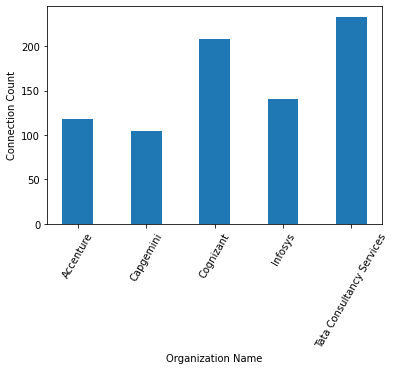

In [115]:
from matplotlib import pyplot as plt
organizations = top_organizations.index.to_list()
cnt = top_organizations.values.tolist()
plt.bar(organizations, cnt, width=0.45)

plt.xlabel("Organization Name")
plt.ylabel("Connection Count")

plt.xticks(rotation=60)
plt.show()

In [175]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('Company != "nan"')
connections

,First Name,Last Name,Email Address,Company,Position,Connected On
0,3078a0ab1e55097b,7efe64fafaa00172,nan,Tata Consultancy Services,Big Data Architect,14 Aug 2019
1,e723cfa0adbed03a,5aa5c3a17b9cedfe,nan,Wavelabs Technologies Private Limited,Manager - HR & Recruitment,14 Aug 2019
2,cf70f1da79b36bd3,e25bc1fa270e9023,nan,Databricks,Solutions Architect,14 Aug 2019
3,0a0fe34746b8b234,51ce6d0eecc44d0f,nan,"Swimelar CPA, PC",President,14 Aug 2019
4,b52d63a6f034471c,bea75ca0d82da8df,nan,Tata Consultancy Services,Consultant,14 Aug 2019
...,...,...,...,...,...,...
23711,0721636b3dad2f48,c687c7f9f0935b12,nan,Renew Financial,Product Manager (Consultant),08 Dec 2006
23712,49e2fc20c8c534d9,7199bb06f79d559c,nan,Tavant,Vice President,05 Dec 2006
23713,530e24a9359bd25c,7c2db58022413a83,nan,The Hartford,Director Of Architecture,28 Nov 2006
23714,6b924ac3bc91a597,98918a0c9ba7e483,nan,Infosys Limited,Senior Principal,26 Nov 2006


In [176]:
connections.count()

First Name       22119
Last Name        22119
Email Address    22119
Company          22119
Position         22119
Connected On     22119
dtype: int64

In [177]:
import numpy as np
connections.replace('nan', np.NaN). \
    count()

First Name       22119
Last Name        22119
Email Address      221
Company          22119
Position         22117
Connected On     22119
dtype: int64

In [178]:
connections_count_by_org = connections. \
    groupby('Company')['Company']. \
    count()

In [179]:
connections_count_by_org = connections_count_by_org[connections_count_by_org.ge(100) == True]
connections_count_by_org

Company
Accenture                    243
Capgemini                    213
Cognizant                    430
Confidential                 109
HCL Technologies             149
IBM                          192
Infosys                      275
Oracle                       109
Tata Consultancy Services    523
Tech Mahindra                118
Name: Company, dtype: int64

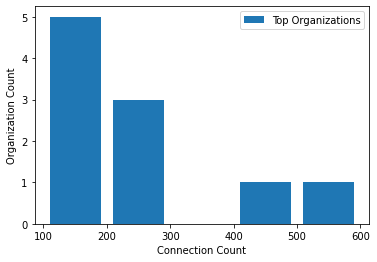

In [180]:
from matplotlib import pyplot as plt

connection_counts = connections_count_by_org.values.tolist()

plt.hist(connection_counts, 
         bins=list(range(100, 601, 100)),
         rwidth=0.8,
         label='Top Organizations'
        );

plt.xlabel('Connection Count')
plt.ylabel('Organization Count')

plt.legend()
plt.show()

In [181]:
import pandas as pd

connections_src = source_file.format(
    base_dir = base_dir,
    file_name = 'Connections.csv'
)

connections = pd.read_csv(connections_src).astype(str)
connections = connections. \
    query('Company != "nan"')
connections

,First Name,Last Name,Email Address,Company,Position,Connected On
0,3078a0ab1e55097b,7efe64fafaa00172,nan,Tata Consultancy Services,Big Data Architect,14 Aug 2019
1,e723cfa0adbed03a,5aa5c3a17b9cedfe,nan,Wavelabs Technologies Private Limited,Manager - HR & Recruitment,14 Aug 2019
2,cf70f1da79b36bd3,e25bc1fa270e9023,nan,Databricks,Solutions Architect,14 Aug 2019
3,0a0fe34746b8b234,51ce6d0eecc44d0f,nan,"Swimelar CPA, PC",President,14 Aug 2019
4,b52d63a6f034471c,bea75ca0d82da8df,nan,Tata Consultancy Services,Consultant,14 Aug 2019
...,...,...,...,...,...,...
23711,0721636b3dad2f48,c687c7f9f0935b12,nan,Renew Financial,Product Manager (Consultant),08 Dec 2006
23712,49e2fc20c8c534d9,7199bb06f79d559c,nan,Tavant,Vice President,05 Dec 2006
23713,530e24a9359bd25c,7c2db58022413a83,nan,The Hartford,Director Of Architecture,28 Nov 2006
23714,6b924ac3bc91a597,98918a0c9ba7e483,nan,Infosys Limited,Senior Principal,26 Nov 2006


In [182]:
connections_count_by_org = connections. \
    groupby('Company')['Company']. \
    count()

In [183]:
connections_count_by_org = connections_count_by_org[
    (connections_count_by_org.ge(10) == True) & 
    (connections_count_by_org.le(50) == True)
]
connections_count_by_org

Company
A.P. Moller - Maersk    11
ADP                     21
Accenture AI            19
Accion Labs             11
Adobe                   16
                        ..
ZS                      15
Zensar Technologies     24
confidential            10
dunnhumby               13
eBay                    12
Name: Company, Length: 182, dtype: int64

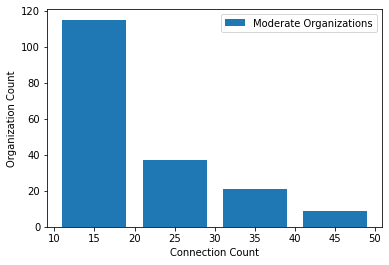

In [186]:
from matplotlib import pyplot as plt

connection_counts = connections_count_by_org.values.tolist()

plt.hist(connection_counts, 
         bins=range(10, 51, 10),
         rwidth=0.8,
         label='Moderate Organizations'
        )

plt.xlabel('Connection Count')
plt.ylabel('Organization Count')

plt.legend()
plt.show()

In [187]:
plt.stackplot?

Signature:
plt.stackplot(
    x,
    *args,
    labels=(),
    colors=None,
    baseline='zero',
    data=None,
    **kwargs,
)
Docstring:
Draw a stacked area plot.

Parameters
----------
x : 1d array of dimension N

y : 2d array (dimension MxN), or sequence of 1d arrays (each dimension 1xN)

    The data is assumed to be unstacked. Each of the following
    calls is legal::

        stackplot(x, y)               # where y is MxN
        stackplot(x, y1, y2, y3, y4)  # where y1, y2, y3, y4, are all 1xNm

baseline : {'zero', 'sym', 'wiggle', 'weighted_wiggle'}
    Method used to calculate the baseline:

    - ``'zero'``: Constant zero baseline, i.e. a simple stacked plot.
    - ``'sym'``:  Symmetric around zero and is sometimes called
      'ThemeRiver'.
    - ``'wiggle'``: Minimizes the sum of the squared slopes.
    - ``'weighted_wiggle'``: Does the same but weights to account for
      size of each layer. It is also called 'Streamgraph'-layout. More
      details can be found at http